## BA 545 Course Project 2: Machine Team 4 
#### Online Shoppers Purchasing Intentions
##### Michael Disanto, Dawn Massey PhD CPA CGMA, Brian Nicholls
###### Preliminary Base Model (1) - Spring 2020
----------------------------------------------------------------------


#### **Table of Contents:**

0. [Preparing for Analyisis](#part1.0)
1. [Initial Review of the Data](#part1.1)
2. [Adjust the Object & Boolean Data Types for Modeling](#part1.2)
3. [Split and Run the Preliminary Models with all Features](#part1.3)
4. [Evaluate all the methods and compare using Ensemble Ranking](#part1.4)


## 0. Preparing for Analysis  <a name="part1.0"></a>
####  Import the necesary packages for reading, analyzing, tidying, modeling, & evaluating the data

In [57]:
# # TO USE FOR ENTIRE TEAM
# import pandas as pd
# import numpy as np
# from pandas_profiling import ProfileReport
# import statsmodels.api as sm
# from scipy import stats
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

In [58]:
# Excluding Items not in Fairfield Jupiter Lab
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px

In [59]:
# Import the necesary packages for reading, analyzing, tidying, modeling, & evaluating the data 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler().fit(X_train) >>> standardized_X = scaler.transform(X_train) >>> standardized_X_test = scaler.transform(X_test)

from sklearn.preprocessing import Normalizer
# scaler = Normalizer().fit(X_train) >>> normalized_X = scaler.transform(X_train) >>> normalized_X_test = scaler.transform(X_test)

from sklearn.preprocessing import Binarizer 
# binarizer = Binarizer(threshold=0.0).fit(X) >>> binary_X = binarizer.transform(X)

# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# enc = LabelEncoder()
# y = enc.fit_transform(y)

# Imputation
from sklearn.impute import (SimpleImputer, KNNImputer, MissingIndicator)
from sklearn.experimental import enable_iterative_imputer
# imp = Imputer(missing_values=0, strategy='mean', axis=0) >>> imp.fit_transform(X_train)
from sklearn.preprocessing import PolynomialFeatures 
# poly = PolynomialFeatures(5) >>> poly.fit_transform(X)

# Train/Test Split
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


# Various Models
from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=3, random_state=0

from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)

from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()

from sklearn.linear_model import RidgeCV
# rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)

from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()

from sklearn.svm import SVC 
# svc = SVC(kernel='linear')

from sklearn.linear_model import LinearRegression
# lr = LinearRegression(normalize=True)

from sklearn import neighbors
# knn = neighbors.KNeighborsClassifier(n_neighbors=5)

## Fit the model
# # Supervised learning
# lr.fit(X, y)
# knn.fit(X_train, y_train)
# svc.fit(X_train, y_train)   

# #Unsupervised Learning 
# k_means.fit(X_train) 
# pca_model = pca.fit_transform(X_train)

## Predict Y
# Supervised Estimators
# y_pred = svc.predict(np.random.random((2,5))) 
# y_pred = lr.predict(X_test)
# y_pred = knn.predict_proba(X_test)   
# Unsupervised Estimators 
# y_pred = k_means.predict(X_test)


# Packages to evaluate Model Performance (Classification)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
# print(classification_report(y_test_log, y_pred_log))

# Packages to evaluate Model Performance (Linear)
from sklearn.metrics import mean_absolute_error 
# y_true = [3, -0.5, 2] >>> mean_absolute_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score 
# r2_score(y_true, y_pred)

#from sklearn.cross_validation import cross_val_score 
# print(cross_val_score(knn, X_train, y_train, cv=4)) >>> print(cross_val_score(lr, X, y, cv=2)

# Packages for Over/Under Sampling
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import NearMiss 

import warnings
warnings.filterwarnings('ignore')


# 1. Initial Review of the Data  <a name="part1.1"></a>

In [60]:
# Pull in our original data and a copy for the base model
df = pd.read_csv('online_shoppers_intention.csv', na_values=r'-')
df_base = df.copy()

In [61]:
# Investigate the datatypes and descriptive statistics of the dataset
display(df_base.info())
display(df_base.describe())
display(df_base.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

None

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157213   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157213   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

# 2. Adjust the Object & Boolean Data Types for Modeling  <a name="part1.2"></a>

In [62]:
# Encode month names to numerical representations
def month_func(month) :
    if month == 'Jan':
        return int(1)
    elif month == 'Feb':
        return int(2)
    elif month == 'Mar':
        return int(3)
    elif month == 'Apr':
        return int(4)
    elif month == 'May':
        return int(5)
    elif month == 'June':
        return int(6)
    elif month == 'Jul':
        return int(7)
    elif month == 'Aug':
        return int(8)
    elif month == 'Sep':
        return int(9)
    elif month == 'Oct':
        return int(10)
    elif month == 'Nov':
        return int(11)
    elif month == 'Dec':
        return int(12)

df_base['Month'] = df_base['Month'].apply(month_func)

In [63]:
# Encode Categorical Features (VisitorType, Weekend) & Target (Revenue)
enc = LabelEncoder()

df_base['VisitorType'] = enc.fit_transform(df_base['VisitorType'])
df_base['Weekend'] = enc.fit_transform(df_base['Weekend'])
df_base['Revenue'] = enc.fit_transform(df_base['Revenue'])

# 3. Split and Run the Preliminary Models with all Features  <a name="part1.3"></a>

In [64]:
# Specify features (X) and target (Y) in dataset
X,y = df_base.iloc[:,:-1],df_base.iloc[:,-1]

In [65]:
# Create train test split for X and y
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=500) 

### 3.1 Naive Bayes Model (NB)
>   <b> F1 Score: </b> .86
<br><b> AUC: </b> .85
<br><b> Next Steps: </b> Additional parameter tuning

#### Import packages

In [66]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#### Specify Model

In [67]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#### Generate Test Data, Build the Models & Assess the Model

y Accuracy: 0.8572587185725872

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3158
           1       0.51      0.55      0.53       541

    accuracy                           0.86      3699
   macro avg       0.72      0.73      0.72      3699
weighted avg       0.86      0.86      0.86      3699



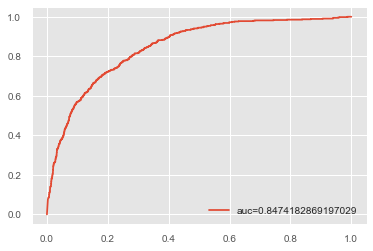

Text(0.5, 257.44, 'Predicted label')

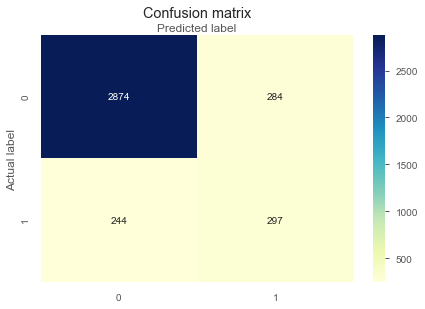

In [68]:
#Train the model using the training sets - for y (Sale)
gnb.fit(X_train, y_train)

#Predict the response for test dataset for y2
y_NB_pred = gnb.predict(X_test)

# Model Accuracy, how often is the classifier correct?
# Accuracy for y2
print("y Accuracy:",metrics.accuracy_score(y_test, y_NB_pred))
print("")

#Can use classification report to assess model adequacy, too
class_names=[0,1] # name  of classes
print(metrics.classification_report(y_test, y_NB_pred, labels=class_names))

#AUC for y
y_NB_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_NB_pred_proba)
auc = metrics.roc_auc_score(y_test, y_NB_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_NB_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


##### Conclusion - With F1 score of .86 the Naive Bayes model is superior to the base model which had a F1 score of .71. However, there is still room for improvement.

### 3.2 Decision Tree Model (DT)
>   <b> F1 Score: </b> .87
<br><b> AUC: </b> .76
<br><b> Next Steps: </b> Additional parameter tuning

#### Specify the Model

In [69]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#### Build the Model

In [70]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_DT_pred = clf.predict(X_test)

In [71]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_DT_pred))

Accuracy: 0.8659097053257637


#### Assess the Model

In [72]:
# Evaluating the Classification Report
print(metrics.classification_report(y_test, y_DT_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3158
           1       0.54      0.62      0.57       541

    accuracy                           0.87      3699
   macro avg       0.73      0.76      0.75      3699
weighted avg       0.87      0.87      0.87      3699



In [73]:
# Evaluating the Confusion Matrix
print(metrics.confusion_matrix(y_test, y_DT_pred))

[[2869  289]
 [ 207  334]]


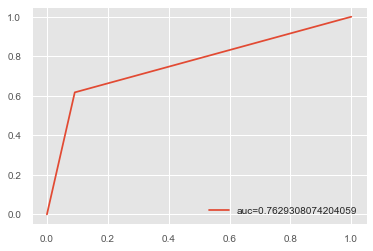

Text(0.5, 257.44, 'Predicted label')

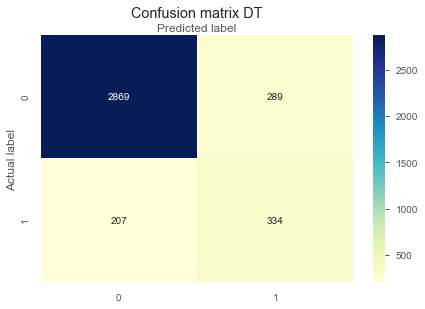

In [74]:
#AUC for y
y_DT_pred_proba = clf.predict_proba(X_test)[::,1]
fpr_DT, tpr_DT, _ = metrics.roc_curve(y_test,  y_DT_pred_proba)
auc_DT = metrics.roc_auc_score(y_test, y_DT_pred_proba)
plt.plot(fpr_DT,tpr_DT,label="auc="+str(auc_DT))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_DT = metrics.confusion_matrix(y_test, y_DT_pred)
cnf_matrix_DT
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DT), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix DT', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### Conclusion - With F1 score of .87 the Decision Tree model is superior to the base model which had a F1 score of .71. However, there is still room for improvement.

#### Model Optimization 

>   <b> F1 Score: </b> .89
<br><b> AUC: </b> .91

In [75]:
# Trying to optimize Decision Tree Model by adding in the parameters "entropy" (information gain selection measure) and "max depth=3"
# # Did this in order to reduce to complexity of the Decision Tree, in hopes that it will yield better results
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion = "entropy", max_depth=3)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,y_train)

#Predict the response for test dataset
y_DT_pred2 = clf2.predict(X_test)

In [76]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_DT_pred2))

Accuracy: 0.8924033522573669


In [77]:
# Evaluating the Classification Report
print(metrics.classification_report(y_test, y_DT_pred2))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3158
           1       0.62      0.67      0.65       541

    accuracy                           0.89      3699
   macro avg       0.78      0.80      0.79      3699
weighted avg       0.90      0.89      0.89      3699



[[2939  219]
 [ 179  362]]


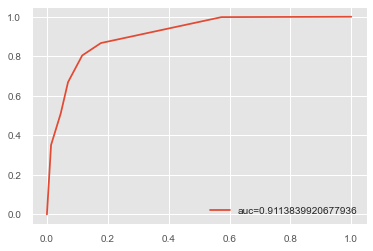

Text(0.5, 257.44, 'Predicted label')

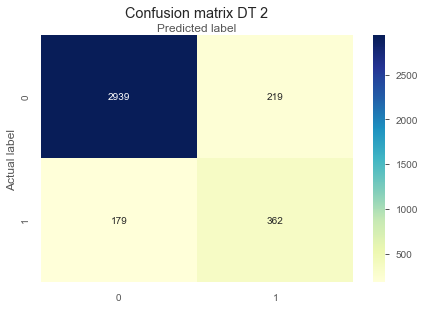

In [78]:
# Evaluating the Confusion Matrix
print(metrics.confusion_matrix(y_test, y_DT_pred2))

#AUC for y
y_DT_pred_proba2 = clf2.predict_proba(X_test)[::,1]
fpr_DT2, tpr_DT2, _ = metrics.roc_curve(y_test,  y_DT_pred_proba2)
auc_DT2 = metrics.roc_auc_score(y_test, y_DT_pred_proba2)
plt.plot(fpr_DT2,tpr_DT2,label="auc="+str(auc_DT2))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_DT2 = metrics.confusion_matrix(y_test, y_DT_pred2)
cnf_matrix_DT2
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DT2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix DT 2', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### Conclusion - Optimized Model yielded an F1 score of .89, which is superior to the base model (.71) and well as the pre-optimized Decision Tree Model (.87)

### 3.3 Random Forest Model (RF)
>   <b> F1 Score: </b> .90
<br><b> AUC: </b> .93
<br><b> Next Steps: </b> Additional parameter tuning

#### Specify the Model

In [79]:
# Building a Classifier
#Import scikit-learn dataset library
from sklearn import datasets

#### Build Model

In [80]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

y_RF_pred = rfc.predict(X_test)

In [81]:
# Evaluation of the Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_RF_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3158
           1       0.70      0.57      0.63       541

    accuracy                           0.90      3699
   macro avg       0.81      0.76      0.79      3699
weighted avg       0.89      0.90      0.90      3699



[[3023  135]
 [ 232  309]]


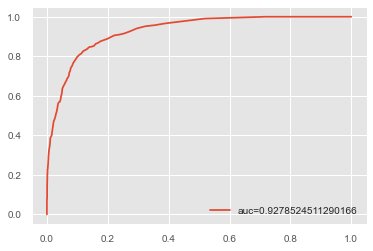

Text(0.5, 257.44, 'Predicted label')

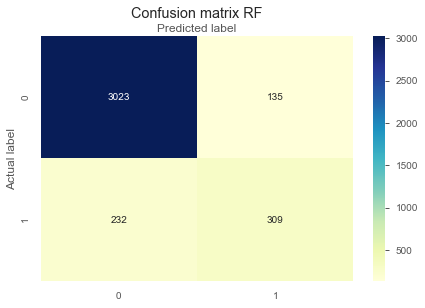

In [82]:
# Evaluation of the Confusion Matrix
print(confusion_matrix(y_test, y_RF_pred))

#AUC for y
y_RF_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr_RF, tpr_RF, _ = metrics.roc_curve(y_test,  y_RF_pred_proba)
auc_RF = metrics.roc_auc_score(y_test, y_RF_pred_proba)
plt.plot(fpr_RF,tpr_RF,label="auc="+str(auc_RF))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_RF = metrics.confusion_matrix(y_test, y_RF_pred)
cnf_matrix_RF
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RF), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix RF', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### Conclusion - With an F1 score of .90 the Random Forest model is superior to the base model which had an F1 score of .71. However, there is still room for improvement.

### 3.4 Support Vector Machines (SVM) Classification Model (SVC)
>   <b> F1 Score: </b> .79
<br><b> AUC: </b> .79
<br><b> Next Steps: </b> SVC ensemble classifiers 

#### Specify the Model

In [83]:
# Specify the Model
from sklearn import svm
svc = svm.SVC(kernel='rbf',cache_size=7000,gamma= 'scale', C=1, probability =True, degree = 3) # gamma= 0.001 , kernel='poly', 'rbf',‘linear’

#### Build/Assess the Model

In [84]:
#Build the Model
#Train the model using the training sets
svc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svc = svc.predict(X_test)

Accuracy_svc: 0.8553663152203298
[[3158    0]
 [ 535    6]]


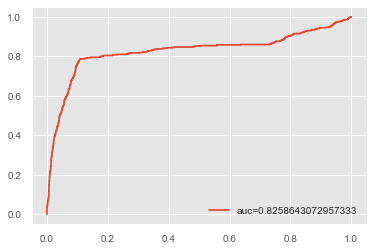


              precision    recall  f1-score   support

           0       0.86      1.00      0.92      3158
           1       1.00      0.01      0.02       541

    accuracy                           0.86      3699
   macro avg       0.93      0.51      0.47      3699
weighted avg       0.88      0.86      0.79      3699

Accuracy_svc: 0.8553663152203298


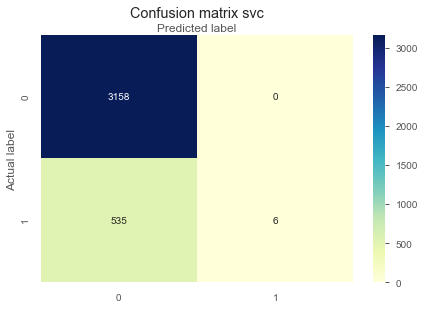

In [85]:
#Assess the Model
print("Accuracy_svc:",metrics.accuracy_score(y_test, y_pred_svc))
cnf_matrix_svc = metrics.confusion_matrix(y_test, y_pred_svc)

print(cnf_matrix_svc)


#AUC for y1
y_SVM_pred_proba = svc.predict_proba(X_test)[::,1]
fpr_SVM, tpr_SVM, _ = metrics.roc_curve(y_test,  y_SVM_pred_proba)
auc_SVM = metrics.roc_auc_score(y_test, y_SVM_pred_proba)
plt.plot(fpr_SVM,tpr_SVM,label="auc="+str(auc_SVM))
plt.legend(loc=4)
plt.show()
print("")

class_names_svc=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_svc = np.arange(len(class_names_svc))
plt.xticks(tick_marks_svc, class_names_svc)
plt.yticks(tick_marks_svc, class_names_svc)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix svc', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_test, y_pred_svc))
print("Accuracy_svc:",metrics.accuracy_score(y_test, y_pred_svc))

##### Conclusion - With an F1 score of .79 the SVM model is superior to the base model which had an F1 score of .71. However, there is still room for improvement.

### 3.5. XGBoost Model (XGB)
>   <b> F1 Score: </b> .90
<br><b> AUC: </b> .92
<br><b> RMSE: </b> .32
<br><b> Next Steps: </b> Additional parameter tuning


#### Import Needed Packages

In [86]:
#Import Needed Packages
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

#### Specify the Model

In [87]:
#Instantiate an XGBoost Classifer Model - for y1 (No_Sale)
XGB_class = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)


#### Generate Test Data, Build the Models & Assess the Models for y2 (Sale)

In [88]:
#Put Data into structure for XGBoost- for y2 (Sale) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

#Train the model using the training sets for y1
XGB_class.fit(X_train, y_train)

#Predict the response for test dataset for y1
y_XGB_pred = XGB_class.predict(X_test)

#Calculate RMSE for y2
rmse_XGB = np.sqrt(mean_squared_error(y_test, y_XGB_pred))
print("XGBoost's RMSE for y2 is: %f" % (rmse_XGB))

#Create error ratio to evaluate results for y2
target_range_XGB = y.max() - y.min()
print("XGB target range is: %f" % (target_range_XGB))
error_ratio_XGB = rmse_XGB/target_range_XGB
print("XGBoost's Error Ratio for y2 is: %f" % (error_ratio_XGB))

XGBoost's RMSE for y2 is: 0.311967
XGB target range is: 1.000000
XGBoost's Error Ratio for y2 is: 0.311967


y Accuracy: 0.902676399026764

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3158
           1       0.70      0.58      0.64       541

    accuracy                           0.90      3699
   macro avg       0.82      0.77      0.79      3699
weighted avg       0.90      0.90      0.90      3699



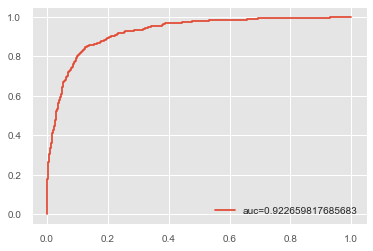

Text(0.5, 257.44, 'Predicted label')

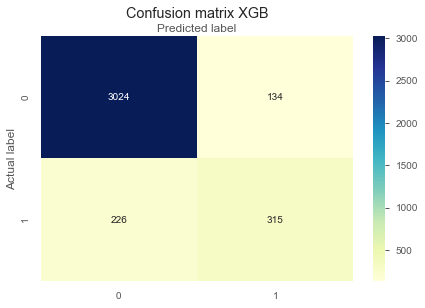

In [89]:
# Model Accuracy, how often is the classifier correct?
# Accuracy for y2
print("y Accuracy:",metrics.accuracy_score(y_test, y_XGB_pred))
print("")


#Can use classification report to assess model adequacy, too
print(metrics.classification_report(y_test, y_XGB_pred, labels=class_names))

#AUC for y1
y_XGB_pred_proba = XGB_class.predict_proba(X_test)[::,1]
fpr_XGB, tpr_XGB, _ = metrics.roc_curve(y_test,  y_XGB_pred_proba)
auc_XGB = metrics.roc_auc_score(y_test, y_XGB_pred_proba)
plt.plot(fpr_XGB,tpr_XGB,label="auc="+str(auc_XGB))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_XGB = metrics.confusion_matrix(y_test, y_XGB_pred)
cnf_matrix_XGB
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_XGB), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix XGB', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### Conclusion - With an F1 score of .90 the XGBoost model is superior to the base model which had an F1 score of .71. However, there is still room for improvement.

### 3.6 Neural Network Model (NN)
>   <b> F1 Score: </b> .87
<br><b> AUC: </b> .88
<br><b> Next Steps: </b> Additional parameter tuning

#### Specify the Model

In [90]:
# X_train, X_test, y1_Models_train, y1_Models_test, y2_Models_train, y2_Models_test

# Import the model
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
# mlp = MLPClassifier(hidden_layer_sizes = (3,1),solver='sgd',learning_rate_init= 0.01, max_iter=50)
mlp= MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9, 
beta_2=0.999, early_stopping=False, epsilon=1e-08,       
hidden_layer_sizes=(10), learning_rate='adaptive',      
learning_rate_init=0.01, max_iter=10, momentum=0.9,       
nesterovs_momentum=True, power_t=0.5, random_state=1000,       
shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,       
verbose=False, warm_start=True)

#### Generate Test Data

In [91]:
# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='adaptive',
              learning_rate_init=0.01, max_fun=15000, max_iter=10, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1000, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=True)

#### Build/Assess the Model

In [92]:
#Build the Model
y_pred_nn = mlp.predict(X_test)


MLP score is 0.8821303054879697
Accuracy_nn: 0.8821303054879697
[[3121   37]
 [ 399  142]]


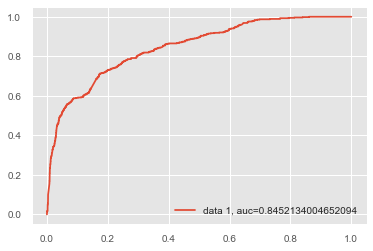

              precision    recall  f1-score   support

           0       0.89      0.99      0.93      3158
           1       0.79      0.26      0.39       541

    accuracy                           0.88      3699
   macro avg       0.84      0.63      0.66      3699
weighted avg       0.87      0.88      0.86      3699

Accuracy_svc: 0.8821303054879697


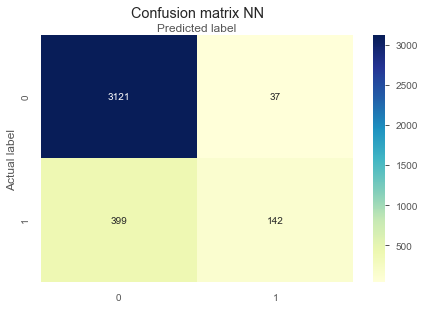

In [93]:
##Assess the Model
# Score takes a feature matrix X_test and the expected target values y_test. 
# Predictions for X_test are compared with y_test

print("MLP score is",mlp.score(X_test,y_test))

# Accuracy for y NN
#print("y Accuracy NN:",metrics.accuracy_score(y_test, y_XGB_pred))
#print("")

###4. Step 4: Assess the Model
print("Accuracy_nn:",metrics.accuracy_score(y_test, y_pred_nn))
cnf_matrix_nn = metrics.confusion_matrix(y_test, y_pred_nn)

print(cnf_matrix_nn)

# Plot AOC
y_pred_proba_nn = mlp.predict_proba(X_test)[::,1]
fpr_nn, tpr_nn, _ = metrics.roc_curve(y_test,  y_pred_proba_nn)
auc_nn = metrics.roc_auc_score(y_test, y_pred_proba_nn)
plt.plot(fpr_nn,tpr_nn,label="data 1, auc="+str(auc_nn))
plt.legend(loc=4)
plt.show()


class_names_nn=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_nn = np.arange(len(class_names_nn))
plt.xticks(tick_marks_nn, class_names_nn)
plt.yticks(tick_marks_nn, class_names_nn)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix NN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_test, y_pred_nn))
print("Accuracy_svc:",metrics.accuracy_score(y_test, y_pred_nn))

#Plot AOC
# y_pred_proba_nn = mlp.predict_proba(X_test)[::,1]
# fpr_nn, tpr_nn, _ = metrics.roc_curve(y_test,  y_pred_proba_nn)
# auc_nn = metrics.roc_auc_score(y_test, y_pred_proba_nn)
# plt.plot(fpr_nn,tpr_nn,label="data 1, auc="+str(auc_nn))
# plt.legend(loc=4)
# plt.show()

##### Conclusion - With an F1 score of .87 the NN model is superior to the base model which had an F1 score of .71. However, there is still room for improvement.

### 3.7 Logistic Regression Model

>   <b> F1 Score: </b> .87
<br><b> AUC: </b> .83
<br><b> Next Steps: </b> Additional parameter tuning


In [94]:
#Build the model
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_LR_pred=logreg.predict(X_test)

In [95]:
# import the metrics class for the Confusion Matrix
from sklearn import metrics
cnf_matrix_LogR = metrics.confusion_matrix(y_test, y_LR_pred)
cnf_matrix_LogR

array([[3079,   79],
       [ 339,  202]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

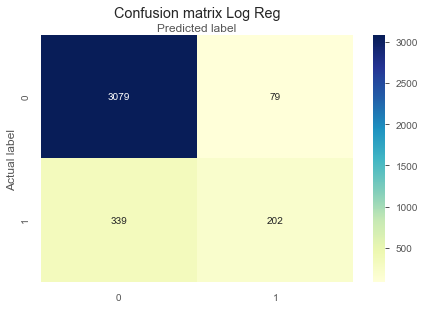

In [96]:
# Visualizing the Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_LogR), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Log Reg', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

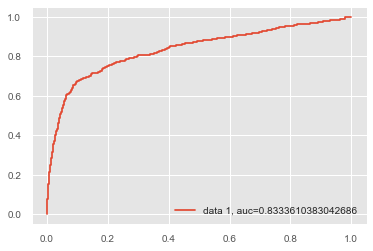

In [97]:
# ROC Curve
y_LR_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr_LR, tpr_LR, _ = metrics.roc_curve(y_test,  y_LR_pred_proba)
auc_LR = metrics.roc_auc_score(y_test, y_LR_pred_proba)
plt.plot(fpr_LR,tpr_LR,label="data 1, auc="+str(auc_LR))
plt.legend(loc=4)
plt.show()

In [98]:
print(metrics.classification_report(y_test, y_LR_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      3158
           1       0.72      0.37      0.49       541

    accuracy                           0.89      3699
   macro avg       0.81      0.67      0.71      3699
weighted avg       0.87      0.89      0.87      3699



In [99]:
print("Accuracy:",metrics.accuracy_score(y_test, y_LR_pred))
print("Precision:",metrics.precision_score(y_test, y_LR_pred))
print("Recall:",metrics.recall_score(y_test, y_LR_pred))

Accuracy: 0.8869964855366316
Precision: 0.7188612099644128
Recall: 0.3733826247689464


##### Conclusion - With an F1 score of .87 the Logistic Regression model is superior to the base model which had an F1 score of .71. However, there is still room for improvement.

### 3.8 K-Means Model - Are we taking this one out?

In [100]:
#important packages

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
%matplotlib inline

In [101]:
X_kmeans = np.array(X_train)
y_kmeans = np.array(y_train)

In [102]:
# Build the model

# load the model
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto') # 2 clusters, sale or no sale
kmeans.fit(X_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [103]:
# Predictions
correct = 0
for i in range(len(X_kmeans)):
    predict_me = np.array(X_kmeans[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y_kmeans[i]:
        correct += 1

print(correct/len(X_kmeans))

0.8110300081103001


# 4. Evaluate all the methods and compare using Ensemble Ranking  <a name="part1.4"></a>

>lr 0.869 (0.020)
>xgb 0.898 (0.014)
>tree 0.870 (0.014)
>svm 0.786 (0.025)
>nn 0.825 (0.033)
>bayes 0.853 (0.019)
>rforest 0.900 (0.013)


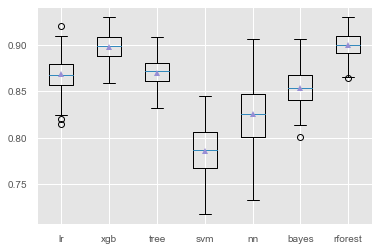

In [104]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
import xgboost as xgb


# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = logreg
    models['xgb'] = XGB_class
    models['tree'] = clf
    models['svm'] = svc
    models['nn'] = mlp
    models['bayes'] = gnb
    models['rforest'] = rfc
    return models

# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=500)
    scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X, y = X_test,y_test
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Given the above, it appears as though Naive Bayes and Decision Tree are inferior to the other models. Further model tuning will bear out whether this initial impression holds.
### XGB performed the best followed by Random Forest and Logistic Regression as the top three models